# Task02 艺术画笔见乾坤

## 1 知识梳理

### 1.1 概述

- 三层API  
  1. 绘图区：`matplotlib.backend_bases.FigureCanvas`  
  2. 渲染器：`matplotlib.backend_bases.Renderer`  
  3. 图表组件：`matplotlib.artist.Artist`，调用Renderer接口在Canvas上绘图

- Artist分类  
  1. 基本元素：包括在绘图区绘图时用到的图形对象，曲线Line2D、文字text、矩形Rectangle、图像image等；  
  2. 容器：包括图形Figure、坐标系Axes和坐标轴Axis。

- 标准使用流程  
  1. 创建一个Figure实例  
  2. 使用Figure实例创建一个或者多个Axes或Subplot实例  
  3. 使用Axes实例的辅助方法创建基本元素

### 1.2 primitives（基本元素）

#### 1.2.1 Line2D（曲线）

- 类：`matplotlib.lines.Line2D`  
- 常用参数：
    - **xdata**：需要绘制的line中点的在x轴上的取值，若忽略，则默认为range(1,len(ydata)+1)
    - **ydata**：需要绘制的line中点的在y轴上的取值
    - **linewidth**：线条的宽度
    - **linestyle**：线型
    - **color**：线条的颜色
    - **marker**：点的标记，详细可参考[markers API](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers)
    - **markersize**：标记的size  
- 设置属性：
    - 直接在plot()函数中设置
    - 通过线对象进行设置
    - 通过线属性，使用setp()函数设置
- 绘制lines：
    - 绘制直线：`pyplot`方法、Line2D对象
    - 绘制误差折线：`errorbar`方法

#### 1.2.2 patches（二维图形）

- 类：`matplotlib.patches.Patch`
- Rectangle（矩形）：
  1. hist（直方图）：  
    常用参数如下：
    - **x**：数据集，最终的直方图将对数据集进行统计
    - **bins**：统计的区间分布
    - **range**：tuple, 显示的区间，range在没有给出bins时生效
    - **density**：bool，默认为false，显示的是频数统计结果，为True则显示频率统计结果，这里需要注意，频率统计结果=区间数目/(总数*区间宽度)，和normed效果一致，官方推荐使用density
    - **histtype**：可选{'bar', 'barstacked', 'step', 'stepfilled'}之一，默认为bar，推荐使用默认配置，step使用的是梯状，stepfilled则会对梯状内部进行填充，效果与bar类似
    - **align**：可选{'left', 'mid', 'right'}之一，默认为'mid'，控制柱状图的水平分布，left或者right，会有部分空白区域，推荐使用默认
    - **log**：bool，默认False,即y坐标轴是否选择指数刻度
    - **stacked**：bool，默认为False，是否为堆积状图
  2. bar（条形图）：  
    常用参数如下：
    - **left**：x轴的位置序列，一般采用range函数产生一个序列，但是有时候可以是字符串
    - **height**：y轴的数值序列，也就是柱形图的高度，一般就是我们需要展示的数据
    - **alpha**：透明度，值越小越透明  
    - **width**：为柱形图的宽度，一般这是为0.8即可；  
    - **color或facecolor**：柱形图填充的颜色；  
    - **edgecolor**：图形边缘颜色   
    - **label**：解释每个图像代表的含义，这个参数是为legend()函数做铺垫的，表示该次bar的标签

- Polygon（多边形）：  
  - 类：`matplotlib.patches.Polygon`  
  - `fill`方法：基于xy绘制一个填充的多边形

- Wedge（契形）
  1. 类：`matplotlib.patches.Wedge`
  2. 构造函数：`class matplotlib.patches.Wedge(center, r, theta1, theta2, width=None, **kwargs) `
  3. 说明：以坐标$(x,y)$为中心，半径为$r$，从$\theta_1$扫到$\theta_2$(单位是度)的契形
  4. `matplotlib.pyplot.pie`（饼图）的常用参数：
    - **x**：契型的形状，一维数组。
    - **explode**：如果不是等于None，则是一个len(x)数组，它指定用于偏移每个楔形块的半径的分数。  
    - **labels**：用于指定每个契型块的标记，取值是列表或为None。  
    - **colors**：饼图循环使用的颜色序列。如果取值为None，将使用当前活动循环中的颜色。  
    - **startangle**：饼状图开始的绘制的角度。 

#### 1.2.3 collections（对象集合）

- 用途：绘制一组对象的集合
- scatter（散点图）构造函数：
> Axes.scatter(self, x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
- scatter（散点图）常用参数：
    - **x**：数据点x轴的位置  
    - **y**：数据点y轴的位置  
    - **s**：尺寸大小  
    - **c**：可以是单个颜色格式的字符串，也可以是一系列颜色  
    - **marker**: 标记的类型     

#### 1.2.4 images

- 用途：绘制image图像
- imshow函数：
> matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs）

### 1.3 Object Container（对象容器）

#### 1.3.1 Figure容器

- `matplotlib.figure.Figure`是最顶层的对象容器
- 一张图表的背景就是`Figure.patch`的一个矩形
- 常见属性：
    - `Figure.patch`属性：Figure的背景矩形  
    - `Figure.axes`属性：一个Axes实例的列表（包括Subplot)  
    - `Figure.images`属性：一个FigureImages patch列表  
    - `Figure.lines`属性：一个Line2D实例的列表（很少使用）  
    - `Figure.legends`属性：一个Figure Legend实例列表（不同于Axes.legends)  
    - `Figure.texts`属性：一个Figure Text实例列表  

#### 1.3.2 Axes容器

- 可以通过Figure.add_axes(\[left,bottom,width,height\])来创建一个任意区域的Axes
- `ax.xaxis`：XAxis对象的实例，用于处理x轴tick以及label的绘制  
- `ax.yaxis`：YAxis对象的实例，用于处理y轴tick以及label的绘制
- 常见属性：
  - `artists`：Artist实例列表
  - `patch`:：Axes所在的矩形实例
  - `collections`：Collection实例
  - `images`：Axes图像
  - `legends`：Legend 实例
  - `lines`：Line2D 实例
  - `patches`：Patch 实例
  - `texts`：Text 实例
  - `xaxis`：matplotlib.axis.XAxis 实例
  - `yaxis`：matplotlib.axis.YAxis 实例

#### 1.3.3 Axis容器

- 用途：处理`tick line`、`grid line`、`tick label`以及`axis label`的绘制
- 常用方法：
  - `get_ticklocs()`：获取刻度线位置
  - `get_ticklabels()`：获取刻度label列表(一个Text实例的列表）。可以通过minor=True|False关键字参数控制输出minor还是major的tick label。
  - `get_ticklines()`：获取刻度线列表(一个Line2D实例的列表）。可以通过minor=True|False关键字参数控制输出minor还是major的tick line。
  - `get_data_interval()`：获取轴刻度间隔
  - `get_view_interval()`：获取轴视角（位置）的间隔

#### 1.3.4 Tick容器

- 常见属性：
  - `Tick.tick1line`：Line2D实例  
  - `Tick.tick2line`：Line2D实例  
  - `Tick.gridline`：Line2D实例  
  - `Tick.label1`：Text实例  
  - `Tick.label2`：Text实例  
- 说明：
  - y轴分为左右两个，因此`tick1`对应左侧的轴；`tick2`对应右侧的轴。   
  - x轴分为上下两个，因此`tick1`对应下侧的轴；`tick2`对应上侧的轴。

## 2 实战练习

### 2.1 通过Rectangle绘制直方图

In [27]:
import pandas as pd
import re

# 生成[0-100)之间的100个数据,即 数据集
x = np.random.randint(0, 100, 100)
# 设置连续的边界值，即直方图的分布区间[0,10),[10,20)...
bins = np.arange(0, 101, 10)

df = pd.DataFrame(columns=['data'])
df.loc[:, 'data'] = x
# 区间构造，得到data的区间分组
df['fenzu'] = pd.cut(df['data'], bins=bins, right=False, include_lowest=True)

# 按照区间进行统计
df_cnt = df['fenzu'].value_counts().reset_index()
# 得到每个区间的最大值和最小值，即边界值
df_cnt.loc[:, 'mini'] = df_cnt['index'].astype(str).map(
    lambda x: re.findall('\[(.*)\,', x)[0]).astype(int)
df_cnt.loc[:, 'maxi'] = df_cnt['index'].astype(str).map(
    lambda x: re.findall('\,(.*)\)', x)[0]).astype(int)
# 得到区间的宽度
df_cnt.loc[:, 'width'] = df_cnt['maxi'] - df_cnt['mini']
# 按照最小值进行区间排序
df_cnt.sort_values('mini', ascending=True, inplace=True)
# 重新索引，删除原索引
df_cnt.reset_index(inplace=True, drop=True)

In [28]:
df_cnt

,index,fenzu,mini,maxi,width
0,"[0, 10)",13,0,10,10
1,"[10, 20)",14,10,20,10
2,"[20, 30)",14,20,30,10
3,"[30, 40)",9,30,40,10
4,"[40, 50)",2,40,50,10
5,"[50, 60)",9,50,60,10
6,"[60, 70)",11,60,70,10
7,"[70, 80)",12,70,80,10
8,"[80, 90)",4,80,90,10
9,"[90, 100)",12,90,100,10


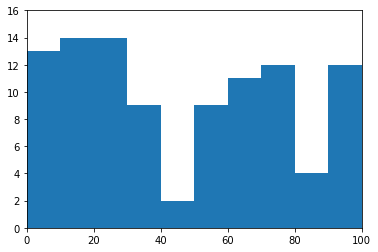

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for i in df_cnt.index:
    rect = plt.Rectangle((df_cnt.loc[i, 'mini'], 0), df_cnt.loc[i, 'width'],
                         df_cnt.loc[i, 'fenzu'])
    ax.add_patch(rect)

ax.set_xlim(0, 100)
ax.set_ylim(0, 16)
plt.show()

### 2.2 通过Rectangle绘制bar柱状图

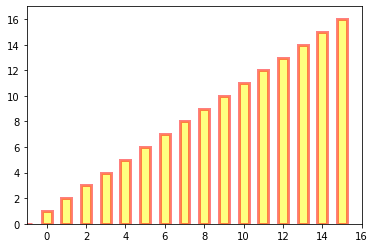

In [66]:
fig, ax = plt.subplots()

for i in range(0, 17):
    rect = plt.Rectangle((i - 1.25, 0), 0.5, i,
                         edgecolor='red', facecolor='yellow', lw=3, alpha=0.5)
    ax.add_patch(rect)

ax.set_xlim(-1, 16)
ax.set_ylim(0, 17)
plt.show()

### 2.3 通过Wedge绘制饼图

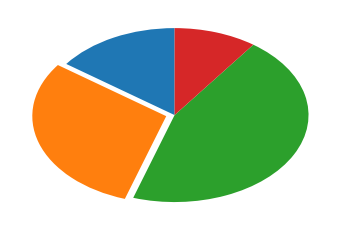

In [158]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle, Wedge
from matplotlib.collections import PatchCollection

# 得到饼图颜色
prop_cycler = mpl.rcParams['axes.prop_cycle']
facecolors = [m['color'] for m in prop_cycler][:4]

fig, ax = plt.subplots()
sizes = [15, 30, 45, 10] 
patches = []
patches += [
    Wedge((0.5, 0.5), .4, 90, 144, facecolor=facecolors[0]),
    Wedge((.475, .495), .4, 144, 252, facecolor=facecolors[1]),
    Wedge((.5, .5), .4, 252, 54, facecolor=facecolors[2]),   
    Wedge((.5, .5), .4, 54, 90, facecolor=facecolors[3]),
]
p = PatchCollection(patches, match_original=True)
ax.add_collection(p)

plt.axis('off')
plt.show()

## 3 课后习题

### 3.1 思考题1
primitives 和 container的区别和联系是什么？

**解答：**

联系：
1. container包含primitives，包括Line2D曲线、Text文字、Patches、collections、image图像等
2. container和primitives都可以设置属性，用于绘制图形
3. container和primitives的基类都是`matplotlib.artist.Artist`
4. Axes container可使用多种方法创建primitives基本元素

区别：
1. primitives只能控制自身元素的属性，通过设置属性，展示不同图形的效果
2. container不能控制基本元素，仅能使用添加/删除元素的方法

### 3.2 思考题2

四个容器的联系和区别是什么？他们分别控制一张图表的哪些要素？

**解答：**

联系：
1. 基类都是`matplotlib.artist.Artist`
2. 包含关系：Figure容器 $\supseteq$ Axes容器 $\supseteq$ Axis容器 $\supseteq$ Tick容器
3. Figure容器和Axes容器都有`patch`、`images`、`lines`、`legends`和`texts`属性

区别和控制对象：
1. Figure容器：控制Axes和subplot对象，包括背景、Axes实例列表、Figure Images patch列表、Line2D实例列表、Figure Legend实例列表和Figure Text实例列表
2. Axes容器：存放用于绘图的Artist对象，控制patch元素，包括绘图区域的形状、背景和边框
3. Axis容器：处理`tick line`、`grid line`、`tick label`以及`axis label`的绘制，控制坐标轴上的刻度线、刻度`label`、坐标网格、坐标轴标题
4. Tick容器：控制`tick`、`grid line`实例以及对应的`label`对象

### 3.3 绘图题1

绘制下图，要求如下：
1. 使用提供的drug数据集，画出下面折线图
2. PA加粗标黄，其他为灰色
3. 图的标题和横纵坐标轴的标题，以及线的文本暂不做要求。  
    
![](https://img-blog.csdnimg.cn/20210523162430365.png)

### 3.4 绘图题2

分别用一组长方形柱和填充面积的方式模仿画出下图，函数 $y = -1 \cdot (x - 2) \cdot (x - 8) +10$ 在区间$[2,9]$的积分面积
![](https://img-blog.csdnimg.cn/20201126105910781.png)
![](https://img-blog.csdnimg.cn/20201126105910780.png)

## 4 总结

&emsp;&emsp;本次任务，主要介绍了概述、基本元素（primitives）和对象容器（container）；概述部分主要讲解了Artist的分类和matplotlib标准使用流程；基本元素部分详细介绍了曲线（Line2D）、二维图形（patches）、集合类（collections）和图像（images）；对象容器部分详细讲解了4大容器，包括常见属性和相关方法的使用；基本上，可以通过上述的内容，了解并能够绘制基本的图形，并达到数据可视化的效果展示。